# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#Mike's Analysis (Final Report):

#Based on the data, there is a strong correlation between temperature and latitude. 
#The temperature generally becomes warmer in the tropical zone nearing the equator, and colder in the polar regions 
#(extreme north and south.)

#Humidity is not strongly correlated to latitude, but the driest cities tend to occur nearer the equatorial zone.

#Cloudiness does not appear to have any correlation to latitude.

#While windiness varies worldwide, extreme windiness only occurs in more northerly or southerly latitudes. 
#Wind speeds over 20 mph do not occur near the equator.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
import csv
from pprint import pprint
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat = {'min': -90, 'max': 90}
lng = {'min': -180, 'max': 180}
lat_values = np.arange(lat['min'], lat['max'], 0.01)
lng_values = np.arange(lng['min'], lng['max'], 0.01)

In [14]:

# Create an empty data frame to city and weather data
column_names = ('city_name', 'country_code', 'rand_lat', 'rand_lng', 'Latitude', 'Longitude','Temp (F)',
            'Humidity (%)','Cloudiness (%)','Wind Speed (mph)')
cities_df = pd.DataFrame(columns = column_names)
cities_df

,city_name,country_code,rand_lat,rand_lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [15]:

'''Query Citipy with random lat-long values until we collect our sample, and append weather
data via Open Weather Map API call.''' 

# Set the sample size.
sample_size = 500

target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

record = 0

## Generate Cities List

In [18]:
# Loop through and grab the Temp, Humidity, Cloudiness and Wind Speed using OpenWeatherMapAPI
    
while len(cities_df) < sample_size:
    # Choose a random point within our lat-lng domain.
    rand_lat = random.choice(lat_values)
    rand_lng = random.choice(lng_values)
    # Call citipy's nearest_city() method to get a city object.
    city = citipy.nearest_city(rand_lat, rand_lng)
    city_name = city.city_name
    country_code = city.country_code
    # Call Open Weather Map API to obtain data and append it to df
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    if weather_json["cod"] == 200:
        print('City: %s. %s' % (weather_json['name'], url))
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
         # Avoid repeating cities
        if city_name not in cities_df.city_name.values:
            print('Status code: %s. DF length is now: %d' % (str(weather_json["cod"]), len(cities_df)+1))
            # Append data to df columns
            cities_df.at[record, "city_name"] = city_name
            cities_df.at[record, "country_code"] = country_code
            cities_df.at[record, "rand_lat"] = rand_lat
            cities_df.at[record, "rand_lng"] = rand_lng
            cities_df.at[record, "Latitude"] = latitude
            cities_df.at[record, "Longitude"] = longitude
            cities_df.at[record, "Temp (F)"] = temp
            cities_df.at[record, "Humidity (%)"] = humidity
            cities_df.at[record, "Cloudiness (%)"] = cloud
            cities_df.at[record, "Wind Speed (mph)"] = wind

            record += 1
        else:
            pass
    else:
        pass
    
print(
    "------------------------------\n"
"Data Retrieval Complete\n"
"------------------------------\n"
)

# Visualize df
cities_df.head()

City: Erzin. http://api.openweathermap.org/data/2.5/weather?q=erzin,ru&units=imperial&APPID=0c04e0f3472cb8448d1973d20ae379ca
Status code: 200. DF length is now: 1
City: Pisco. http://api.openweathermap.org/data/2.5/weather?q=pisco,pe&units=imperial&APPID=0c04e0f3472cb8448d1973d20ae379ca
Status code: 200. DF length is now: 2
City: Hobyo. http://api.openweathermap.org/data/2.5/weather?q=hobyo,so&units=imperial&APPID=0c04e0f3472cb8448d1973d20ae379ca
Status code: 200. DF length is now: 3
City: Cape Town. http://api.openweathermap.org/data/2.5/weather?q=cape town,za&units=imperial&APPID=0c04e0f3472cb8448d1973d20ae379ca
Status code: 200. DF length is now: 4
City: Narsaq. http://api.openweathermap.org/data/2.5/weather?q=narsaq,gl&units=imperial&APPID=0c04e0f3472cb8448d1973d20ae379ca
Status code: 200. DF length is now: 5
City: Pevek. http://api.openweathermap.org/data/2.5/weather?q=pevek,ru&units=imperial&APPID=0c04e0f3472cb8448d1973d20ae379ca
Status code: 200. DF length is now: 6
City: Tricas

,city_name,country_code,rand_lat,rand_lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,erzin,ru,48.1,96.06,50.26,95.16,10.34,67,56,8.79
1,pisco,pe,-25.2,-97.75,-13.71,-76.2,71.6,30,40,8.05
2,hobyo,so,1.68,53.06,5.35,48.53,78.92,87,0,11.21
3,cape town,za,-58.07,-16.94,-33.93,18.42,69.66,94,75,13.87
4,narsaq,gl,77.44,-61.69,60.91,-46.05,30.2,86,75,4.7


In [19]:
# The total sample size.
len(cities_df)

500

In [21]:
# Save the DataFrame as a csv
cities_df.to_csv("weatherpy_data.csv", encoding="utf-8", index=False)

In [26]:
latitude = cities_df["Latitude"]
temp = cities_df["Temp (F)"]
humid = cities_df["Humidity (%)"]
cloud = cities_df["Cloudiness (%)"]
wind = cities_df["Wind Speed (mph)"]

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

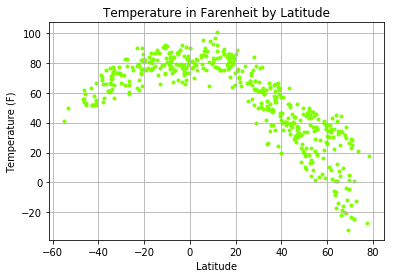

In [53]:
plt.title("Temperature in Farenheit by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

plt.scatter(latitude, temp, marker=".", color="chartreuse")
plt.show()

#### Latitude vs. Humidity Plot

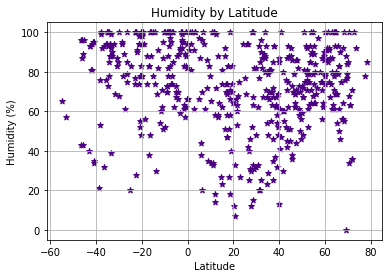

In [70]:
plt.title("Humidity by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.scatter(latitude, humid, marker="*", color="indigo")
plt.show()

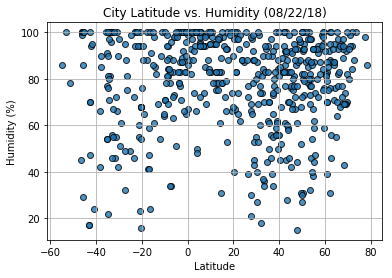

#### Latitude vs. Cloudiness Plot

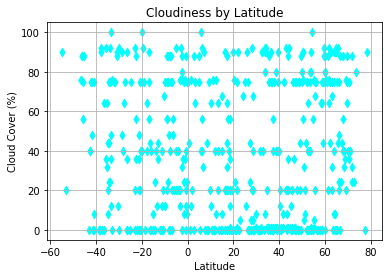

In [73]:
plt.title("Cloudiness by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")
plt.grid(True)

plt.scatter(latitude, cloud, marker="d", color="cyan")
plt.show()

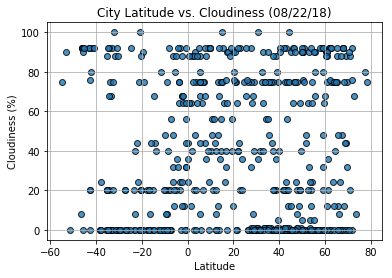

#### Latitude vs. Wind Speed Plot

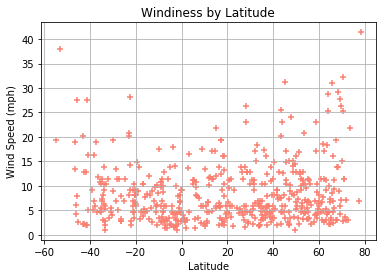

In [81]:
plt.title("Windiness by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.scatter(latitude, wind, marker="+", color="salmon")
plt.savefig('windiness.png')plt.show()

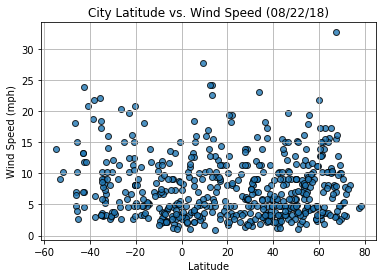